Data Understanding:

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

Survival	0 = No, 1 = Yes

Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [21]:
import pandas as pd

In [22]:
df=pd.read_csv('Titanic.csv')

In [23]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


Age column needs to be filled,
Cabin needs to be dropped

Drop Passengerid, Name --> trivial column

In [25]:
df.drop(['PassengerId','Name','Cabin'],axis=1,inplace=True)

In [26]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [27]:
df.describe(include='object')

,Sex,Ticket,Embarked
count,418,418,418
unique,2,363,3
top,male,PC 17608,S
freq,266,5,270


In [28]:
df.duplicated().sum()   

np.int64(1)

In [29]:
df.drop_duplicates(inplace=True)

In [30]:
import matplotlib.pyplot as plt

array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>],
       [<Axes: title={'center': 'Parch'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

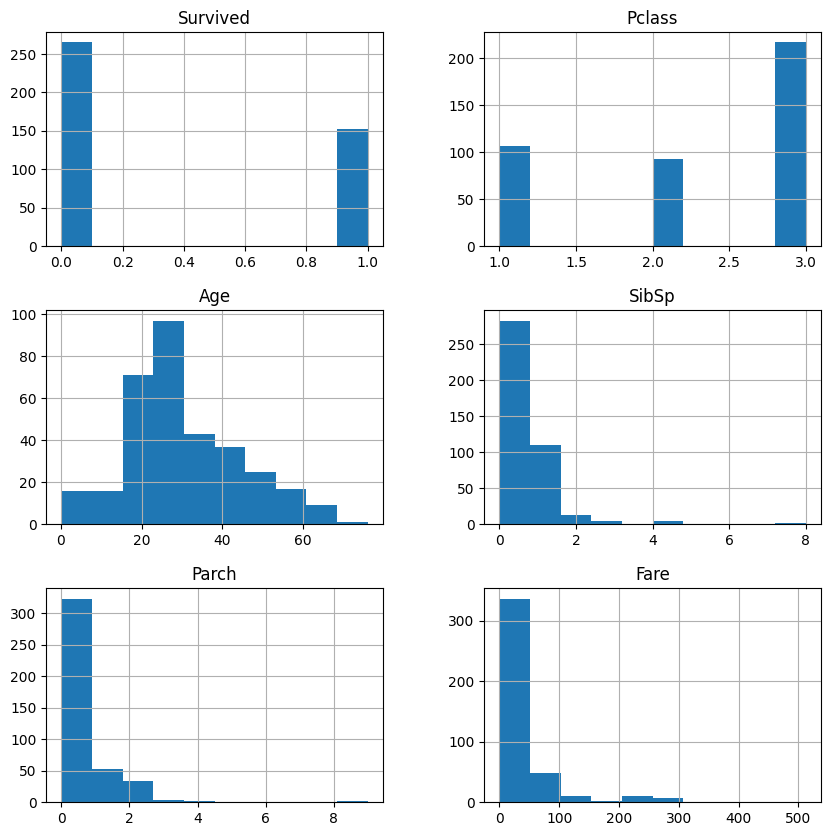

In [31]:
df.hist(figsize=(10,10))

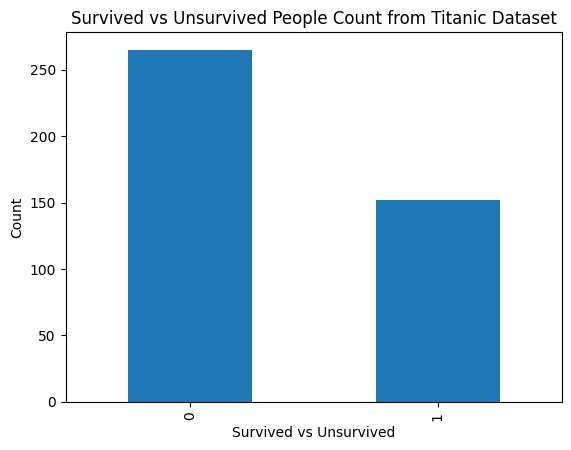

In [32]:
df['Survived'].value_counts().plot(kind='bar')

plt.title('Survived vs Unsurvived People Count from Titanic Dataset')
plt.xlabel('Survived vs Unsurvived')
plt.ylabel('Count')
plt.show()

Survivded is less than the number of unsurvived people

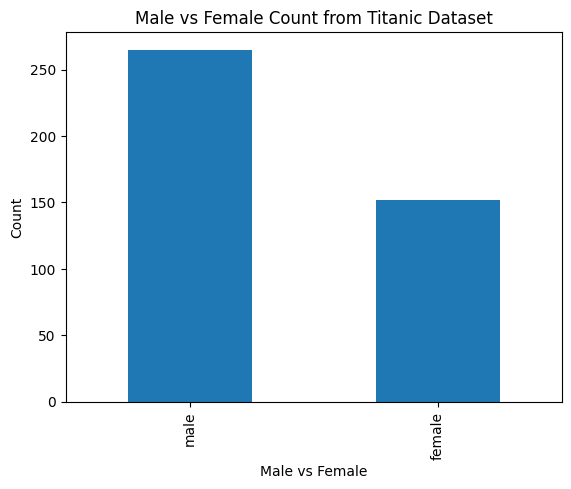

In [33]:
df['Sex'].value_counts().plot(kind='bar')

plt.title('Male vs Female Count from Titanic Dataset')
plt.xlabel('Male vs Female')
plt.ylabel('Count')
plt.show()

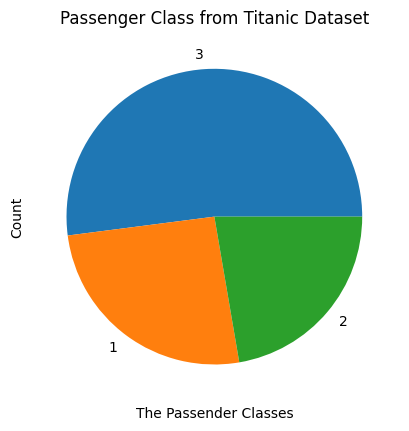

In [34]:
df['Pclass'].value_counts().plot(kind='pie')

plt.title('Passenger Class from Titanic Dataset')
plt.xlabel('The Passender Classes')
plt.ylabel('Count')
plt.show()

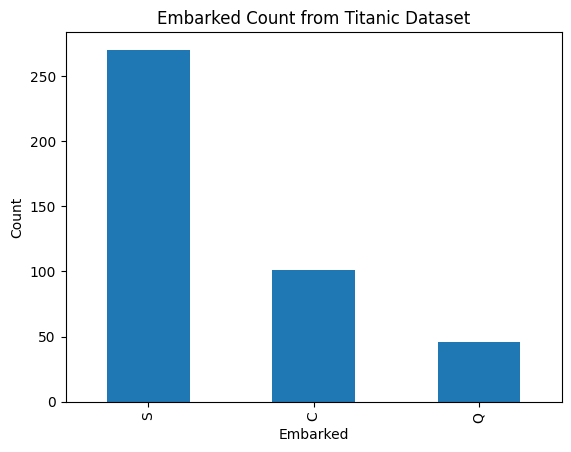

In [35]:
df['Embarked'].value_counts().plot(kind='bar')

plt.title('Embarked Count from Titanic Dataset')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'Passenger Class who survived from Titanic Dataset')

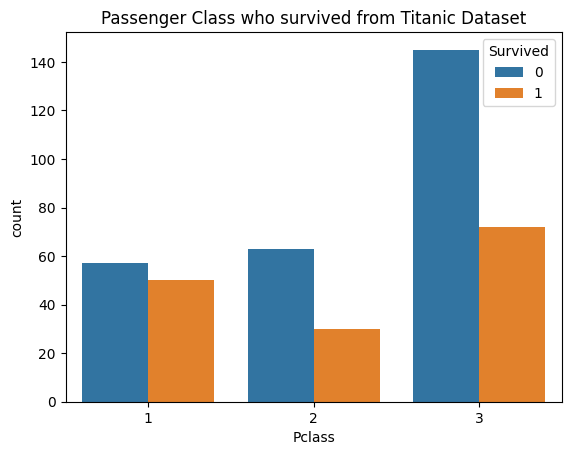

In [ ]:
import seaborn as sb

sb.countplot(data = df, x = 'Pclass', hue = 'Survived')
plt.title('Passenger Class who survived from Titanic Dataset')

Text(0.5, 1.0, 'Passenger Sex who survived from Titanic Dataset')

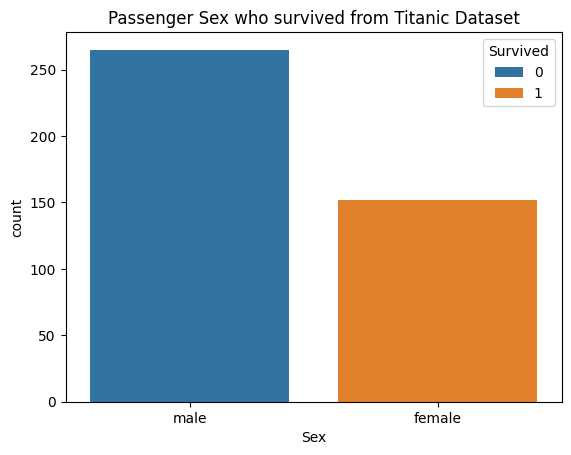

In [38]:
sb.countplot(data = df, x = 'Sex', hue = 'Survived')
plt.title('Passenger Sex who survived from Titanic Dataset')

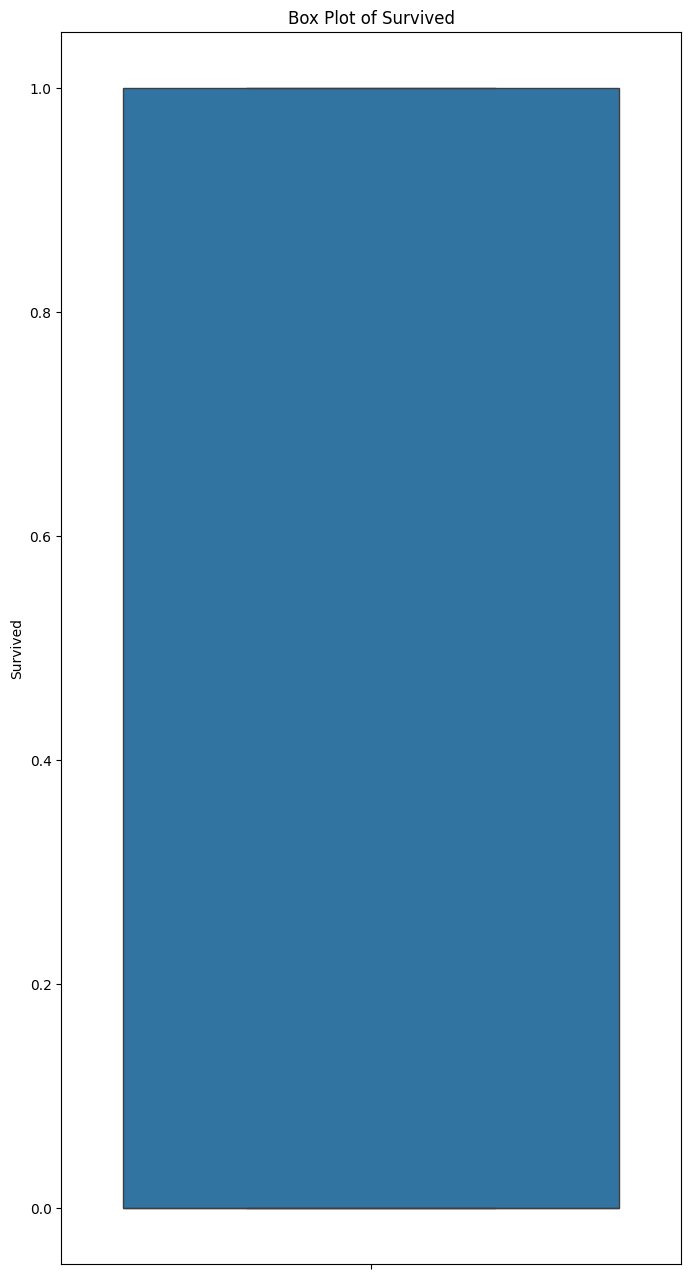

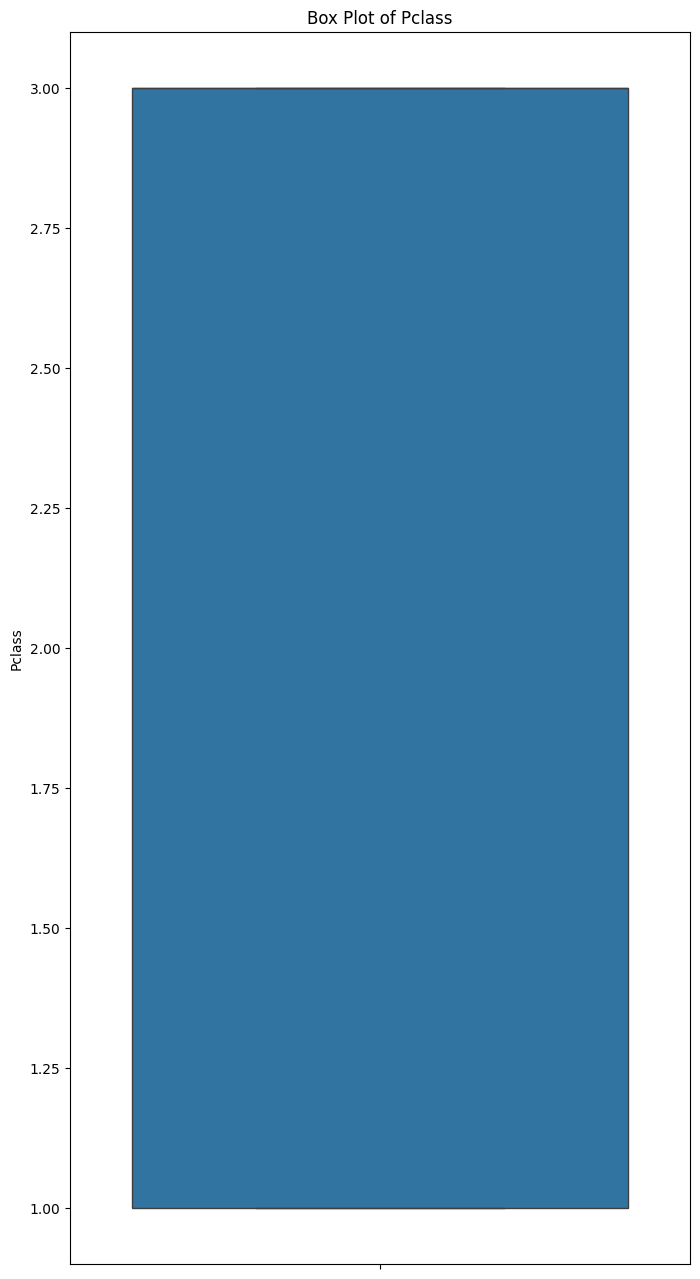

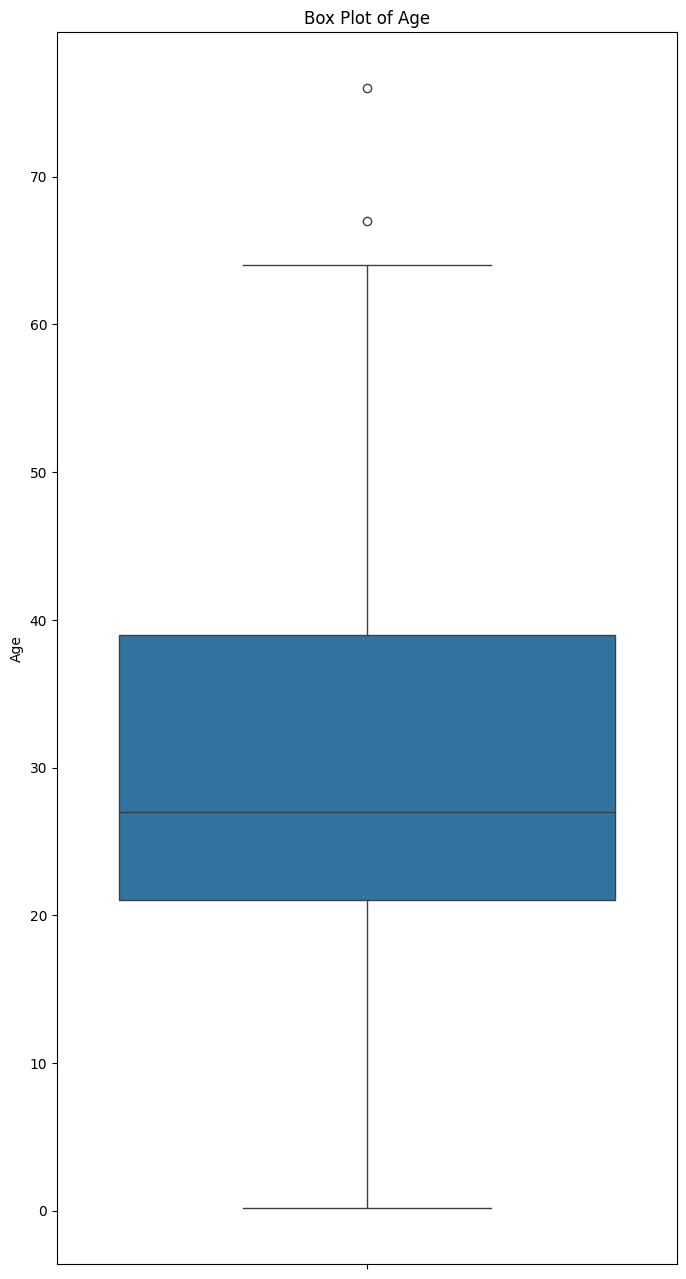

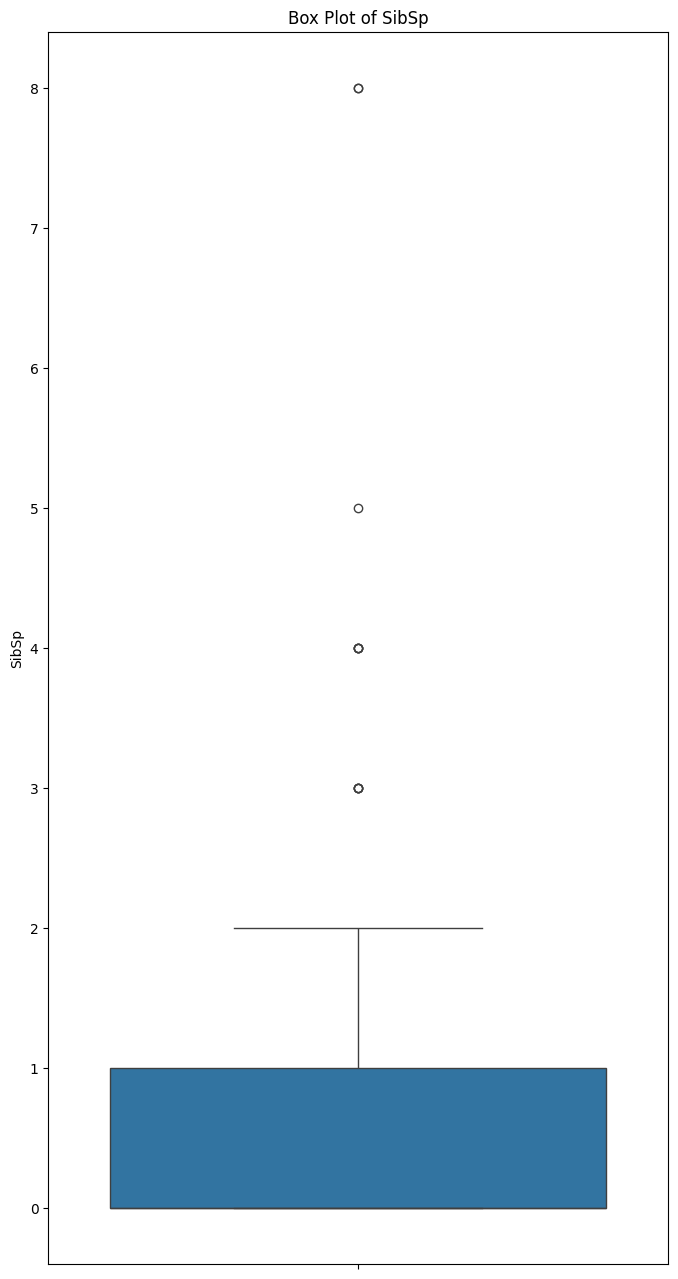

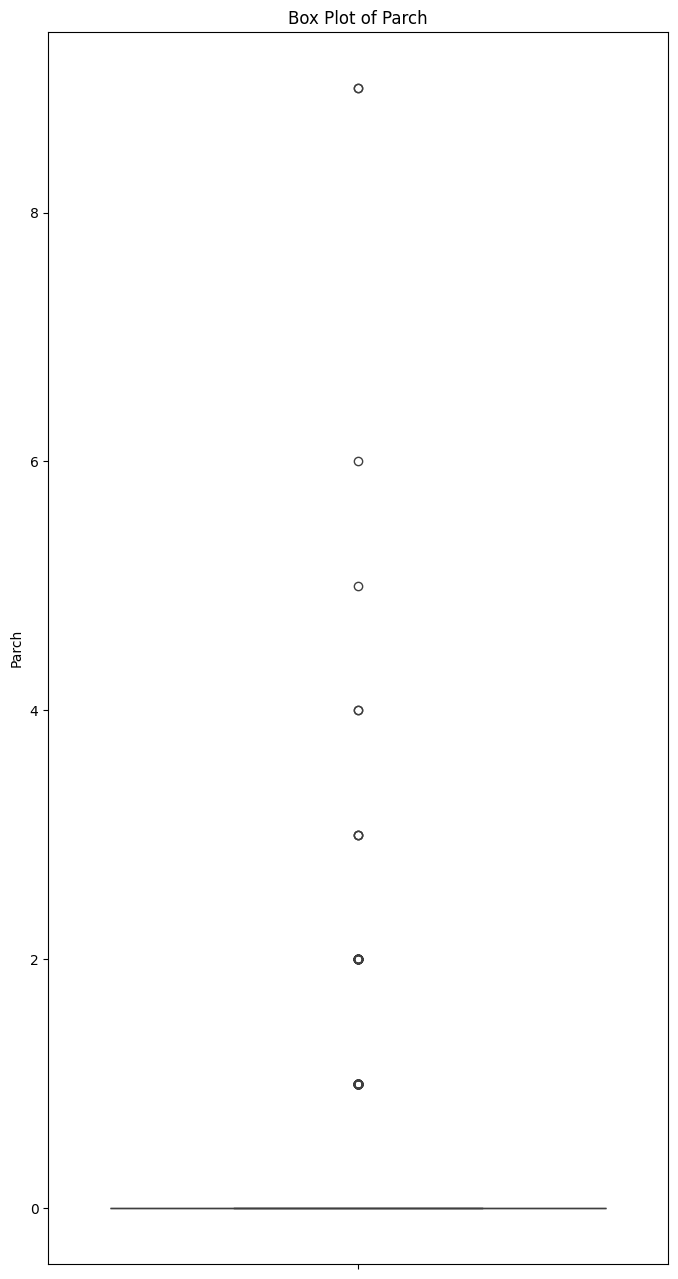

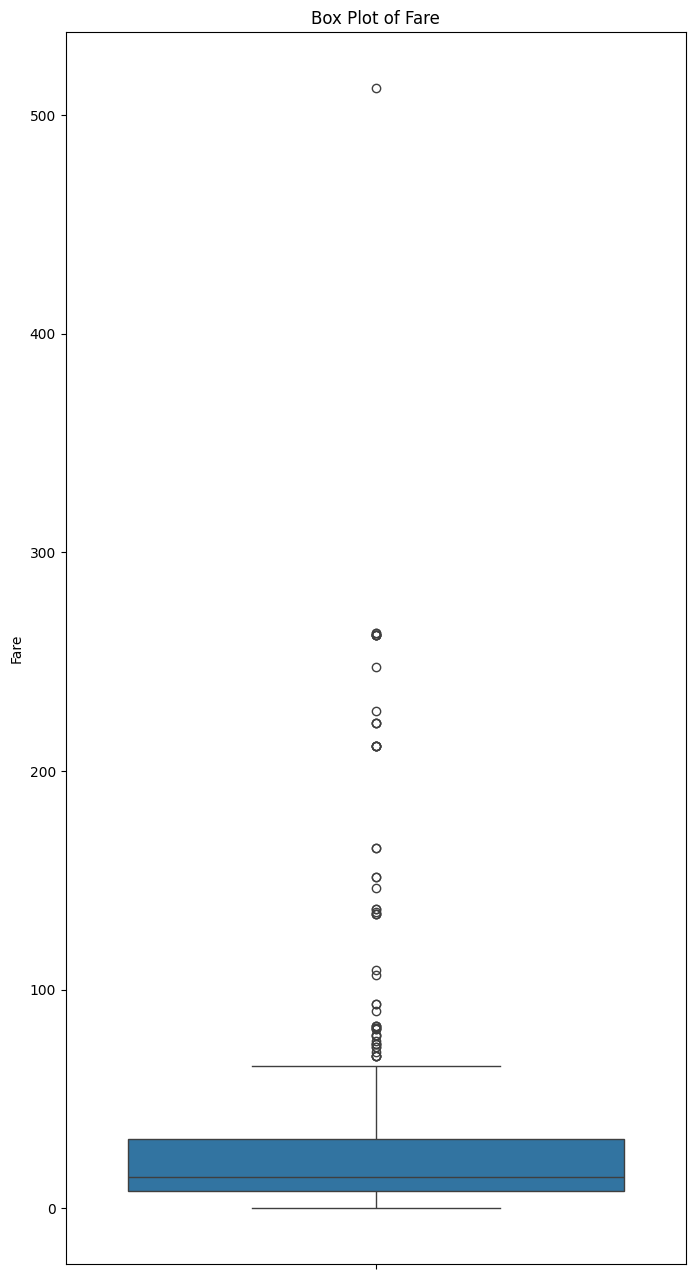

In [41]:
# Select only numerical columns
numeric_cols = df.select_dtypes(include=['number']).columns

# Create box plots for each numerical column
for col in numeric_cols:
    plt.figure(figsize=(8, 16))
    sb.boxplot(data=df, y=col)
    plt.title(f'Box Plot of {col}')
    plt.show()


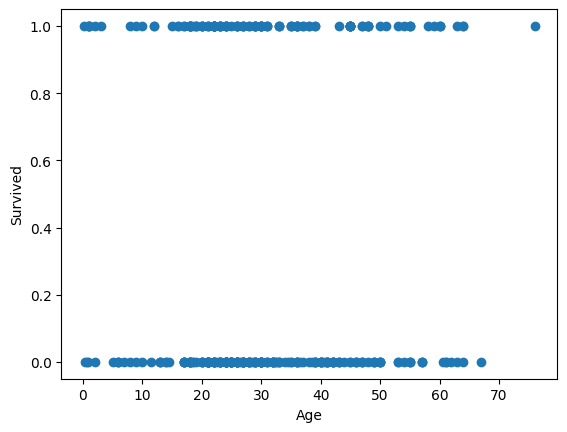

In [42]:
plt.scatter(data = df, x = 'Age', y = 'Survived')

plt.xlabel('Age')
plt.ylabel('Survived')
plt.show()

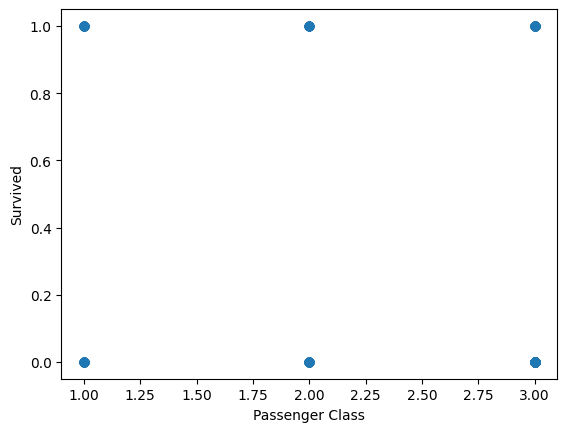

In [44]:
plt.scatter(data = df, x = 'Pclass', y = 'Survived')

plt.xlabel('Passenger Class')
plt.ylabel('Survived')
plt.show()

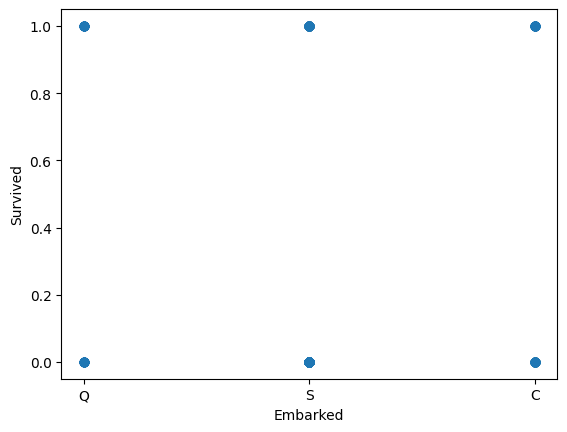

In [45]:
plt.scatter(data = df, x = 'Embarked', y = 'Survived')

plt.xlabel('Embarked')
plt.ylabel('Survived')
plt.show()